In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate
from tensorflow.keras.models import Sequential
import pandas as pd

In [2]:
TRAIN_SET = '../mit_train_set.pickle'
TEST_SET = '../mit_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train_mlp = x_train
x_test_mlp = x_test



x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [3]:
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:


CNN_model = Sequential()
CNN_model.add(Conv1D(5, kernel_size=3, strides=1, input_shape=x_train.shape[1:]))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Conv1D(10, kernel_size=4, strides=1))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Conv1D(20, kernel_size=4, strides=1))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30))
CNN_model.add(LeakyReLU())
CNN_model.add(Dense(20))
CNN_model.add(LeakyReLU())
CNN_model.add(Dense(5, activation="softmax"))
    
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 185, 5)            20        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 185, 5)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 10)            210       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 89, 10)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 44, 10)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 20)            8

In [5]:

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
CNN_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
CNN_history = CNN_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7487 - accuracy: 0.7186 - val_loss: 0.4062 - val_accuracy: 0.8565
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3132 - accuracy: 0.8871 - val_loss: 0.3377 - val_accuracy: 0.8922
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2434 - accuracy: 0.9142 - val_loss: 0.3569 - val_accuracy: 0.9007
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2011 - accuracy: 0.9293 - val_loss: 0.3386 - val_accuracy: 0.8969
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1761 - accuracy: 0.9398 - val_loss: 0.3439 - val_accuracy: 0.8988
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1539 - accuracy: 0.9469 - val_loss: 0.3467 - val_accuracy: 0.9039
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1393 - accuracy: 0.9531 - val_loss: 0.3345 - val_ac

In [38]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(187, 1)))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(5, activation='softmax'))



In [39]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
LSTM_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 645       
Total params: 25,861
Trainable params: 25,861
Non-trainable params: 0
_________________________________________________________________


In [40]:
LSTM_history = LSTM_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 107s 67ms/step - loss: 1.2961 - accuracy: 0.4456 - val_loss: 0.9789 - val_accuracy: 0.6178
Epoch 2/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9030 - accuracy: 0.6649 - val_loss: 0.8411 - val_accuracy: 0.6839
Epoch 3/20
1563/1563 [==============================] - 126s 81ms/step - loss: 0.7703 - accuracy: 0.7244 - val_loss: 0.7178 - val_accuracy: 0.7381
Epoch 4/20
1563/1563 [==============================] - 121s 77ms/step - loss: 0.6736 - accuracy: 0.7616 - val_loss: 0.6427 - val_accuracy: 0.7740
Epoch 5/20
1563/1563 [==============================] - 121s 78ms/step - loss: 0.6408 - accuracy: 0.7727 - val_loss: 0.6108 - val_accuracy: 0.7869
Epoch 6/20
1563/1563 [==============================] - 121s 78ms/step - loss: 0.5978 - accuracy: 0.7890 - val_loss: 0.6806 - val_accuracy: 0.7556
Epoch 7/20
1563/1563 [==============================] - 119s 76ms/step - loss: 0.5628 - accuracy: 0.8036 - val_loss: 0

In [9]:
MLP_model = Sequential()
MLP_model.add(Dense(5, input_shape=(187, )))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Flatten())
MLP_model.add(Dense(5, activation='softmax'))
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
MLP_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 940       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [10]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
MLP_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 940       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [12]:
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 940       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [22]:
MLP_history = MLP_model.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test))

Epoch 1/20
1563/1563 [==============================] - 3s 1ms/step - loss: 0.7702 - accuracy: 0.7039 - val_loss: 0.7167 - val_accuracy: 0.7409
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4075 - accuracy: 0.8494 - val_loss: 0.5169 - val_accuracy: 0.8206
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3464 - accuracy: 0.8720 - val_loss: 0.4481 - val_accuracy: 0.8426
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3062 - accuracy: 0.8855 - val_loss: 0.4773 - val_accuracy: 0.8364
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2747 - accuracy: 0.8968 - val_loss: 0.4557 - val_accuracy: 0.8247
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2479 - accuracy: 0.9073 - val_loss: 0.4291 - val_accuracy: 0.8454
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2326 - accuracy: 0.9135 - val_loss: 0.4962 - val_accuracy:

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_history(history):
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    
def plot_confusion(model, name):
    predictions = model.predict(x_test)
    matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
    df_cm = pd.DataFrame(matrix, range(5), range(5))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Supraventricular Ectopic", "Ventricular Ectopic", "Fusion", "Unknown"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

def plot_confusion_mlp(model, name):
    predictions = model.predict(x_test_mlp)
    matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
    df_cm = pd.DataFrame(matrix, range(5), range(5))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Supraventricular Ectopic", "Ventricular Ectopic", "Fusion", "Unknown"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

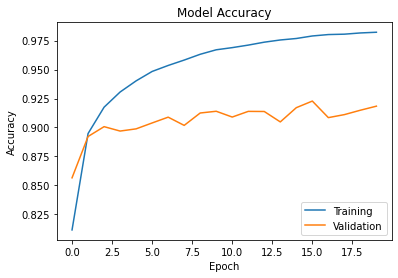

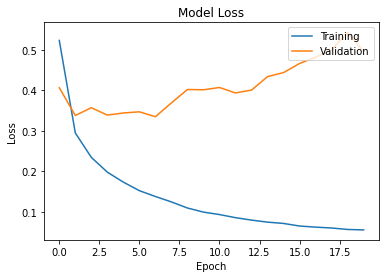

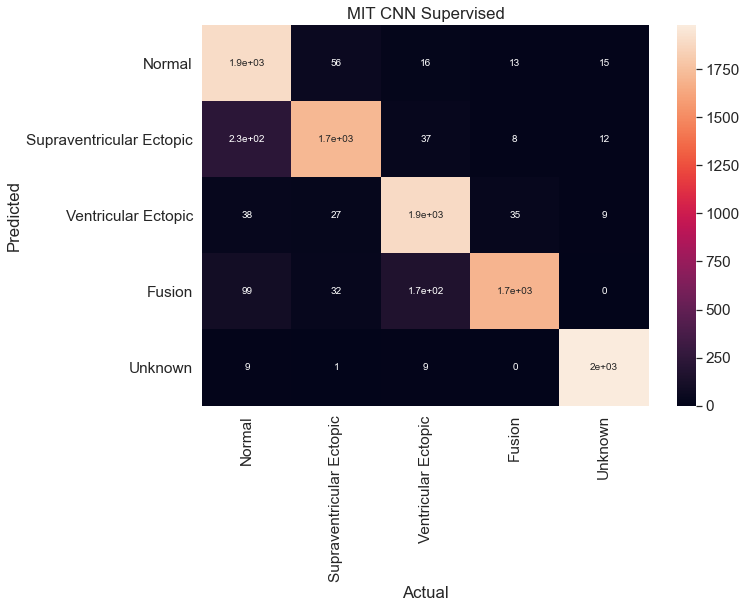

In [8]:
plot_history(CNN_history)
plot_confusion(CNN_model, "MIT CNN Supervised")

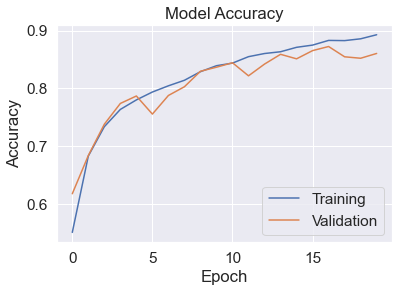

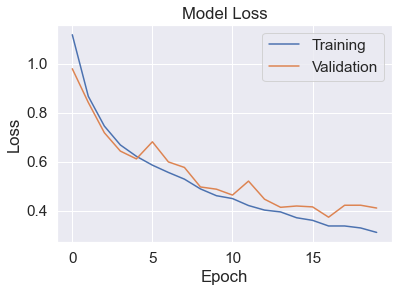

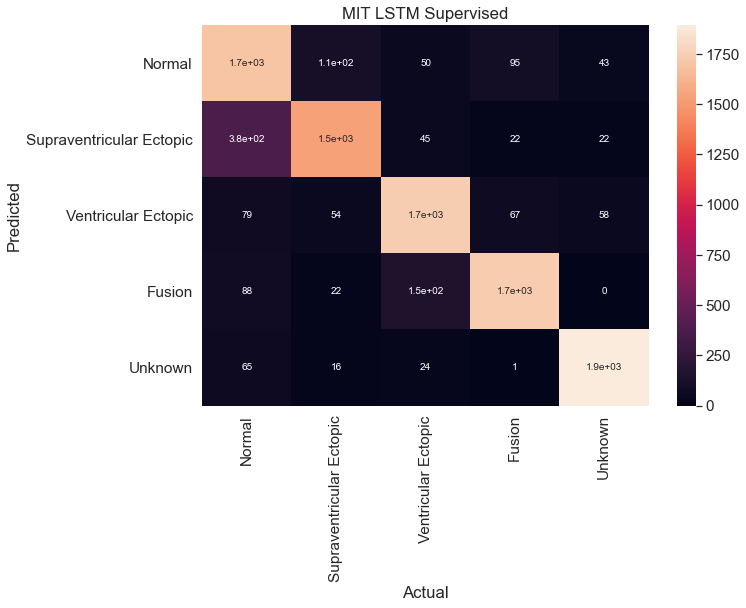

In [47]:
plot_history(LSTM_history)
plot_confusion(LSTM_model, "MIT LSTM Supervised")

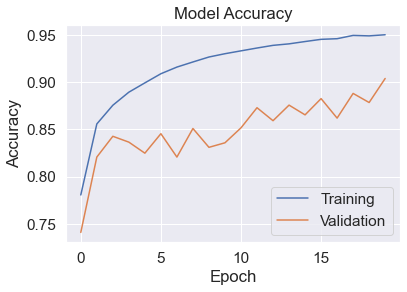

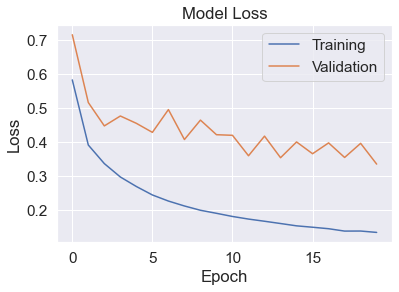

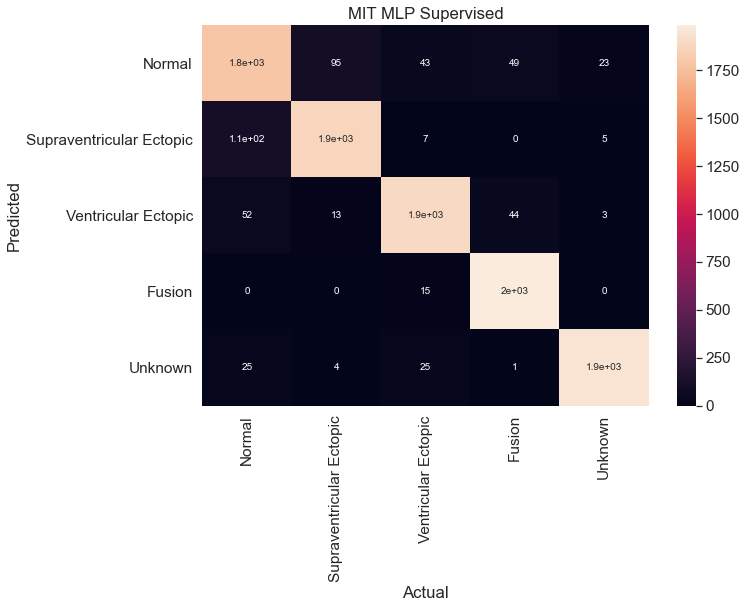

In [51]:
plot_history(MLP_history)
plot_confusion_mlp(MLP_model, "MIT MLP Supervised")